# Univariate,Bivariate and Multivariate Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.shape

(150, 5)

## Univariate Analysis

In [5]:
df_setosa=df.loc[df['species']=='setosa']

In [6]:
df_virginica=df.loc[df['species']=='virginica']
df_versicolor=df.loc[df['species']=='versicolor']

Text(0.5, 0, 'Sepal Length')

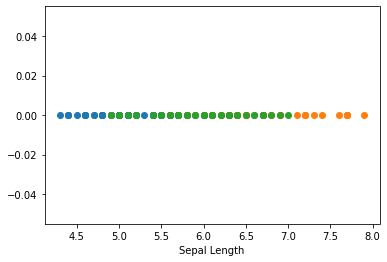

In [7]:
plt.plot(df_setosa['sepal_length'],np.zeros_like(df_setosa['sepal_length']),'o')
plt.plot(df_virginica['sepal_length'],np.zeros_like(df_virginica['sepal_length']),'o')
plt.plot(df_versicolor['sepal_length'],np.zeros_like(df_versicolor['sepal_length']),'o');
plt.xlabel('Sepal Length')

## Bivariate Analysis

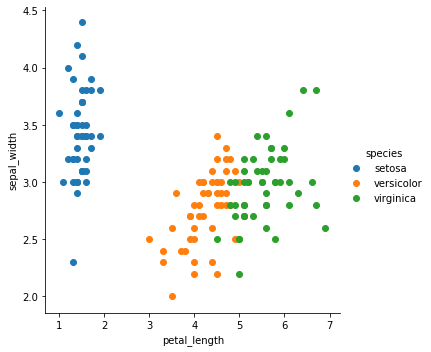

In [8]:
sns.FacetGrid(df,hue='species',height=5).map(plt.scatter,'petal_length','sepal_width').add_legend();

## Multivariate Analysis

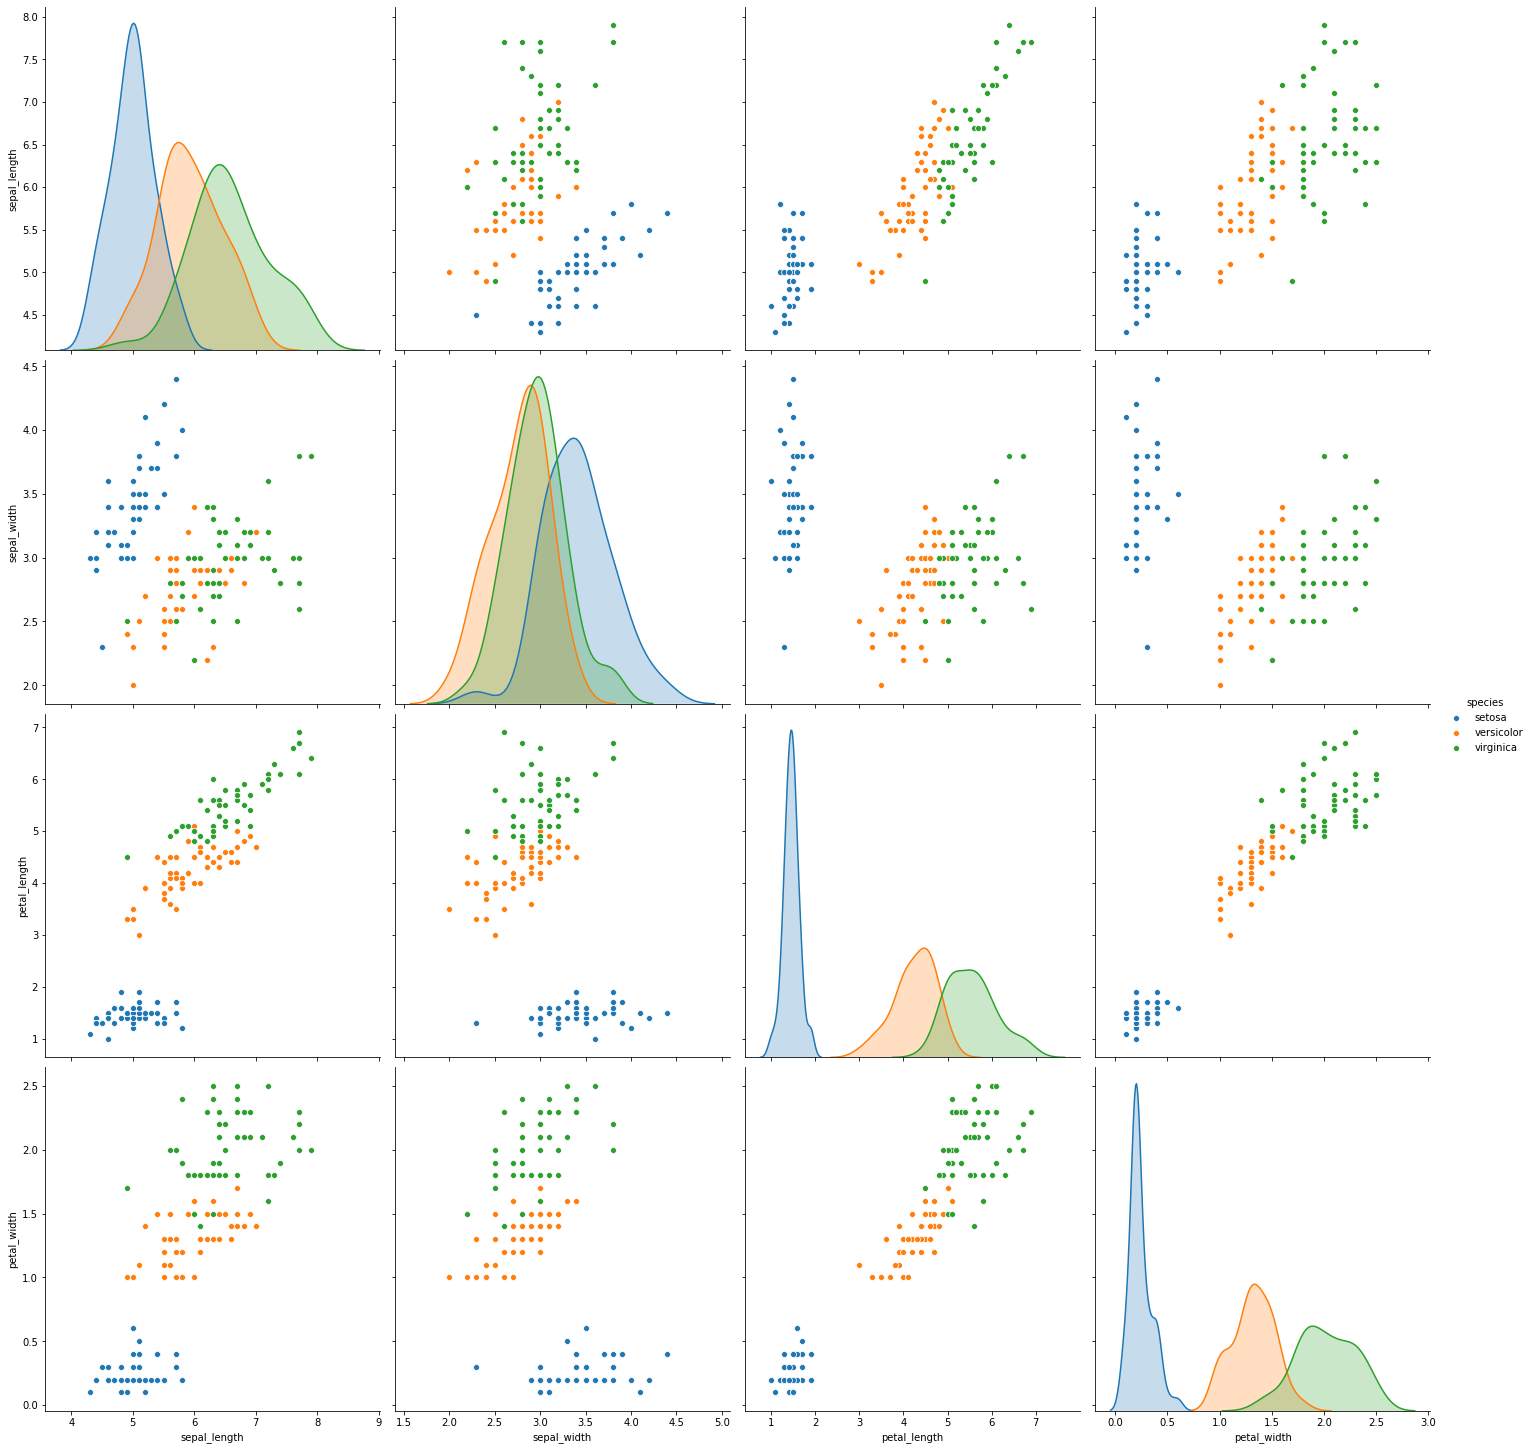

In [9]:
sns.pairplot(df,hue='species',height=5);

# What is an Outlier?
An outlier is a data point in a data set that is distant from all other observations.A data point that lies outside the overall distribution of the dataset.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## What are the criteria to identify an outlier?
1. Data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile.
2. Data point that falls outside of 3 standard deviations.We can use a Z score and if the Z score fallsoutside of 2 standard deviation.

## What is the reason for an outlier to exists in a dataset?
1. Variability in the data.
2. An experimental measurement error.

## What are the impacts of having outliers in a dataset?
1. It causes various problems during our statistical analysis.
2. It may cause a significant impact on the mean and the standard deviation.

### Z-score=(random variable - mean)/S.D

### IQR= {75% no. - 25% no.}
#### Percentile no.
e.g. [5,6,7,1,2,3,4]
* firstly sort them,we get [1,2,3,4,5,6,7]
* then we can say that-
* 1 is 0 percentile.
* 2 is 10 percentile.
* 3 is 20 percentile and so on.
means "20 percent of numbers in the distribution is less than 3"

## Various ways of finding the outlier.
1. Using scatter plots.
2. Box plot.
3. Using Z-score.
4. Using the IQR interquantile range

In [17]:
dataset=[11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,12,14,12,14,12,108,12,11,14,13,15,10,15,12,14,15,10,11]

## Detecting Outlier using Z score
### Using Z score
Formula for Z score=(Observation-Mean)/Standard Deviation


In [18]:
outliers=[]
def detect_outliers(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        z_score=(i-mean)/std
        if(np.abs(z_score)>threshold):
            outliers.append(i)
    return outliers

In [19]:
outlier_pt=detect_outliers(dataset)

In [20]:
outlier_pt

[102, 107, 108]

### InterQuantile Range
75%-25% values in dataset

### Steps
1. Arrange the data in increasing order
2. Calculate first quartile(q1) and third quartile(q3)
3. Find interquartile range(q3-q1)
4. Find lower bound q1*1.5
5. Find upper bound q3*1.5

* Anything that lies outside of lower and upper bound is an outlier

In [21]:
sorted(dataset)

[10,
 10,
 10,
 10,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [22]:
quantile1,quantile3=np.percentile(dataset,[25,75])

In [23]:
print(quantile1,quantile3)

12.0 15.0


In [24]:
## Find the IQR
iqr_value=quantile3-quantile1
print(iqr_value)

3.0


In [30]:
## Find the lower bound value and upper bound value.
lower_bound_val=quantile1-(1.5*iqr_value)
upper_bound_val=quantile3 +(1.5*iqr_value)

In [31]:
print(lower_bound_val,upper_bound_val)

7.5 19.5
